In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from stop_dependence import impurity_decrease_accuracy_dependence, samples_split_accuracy_dependence, \
depth_accuracy_dependence

In [2]:
data = pd.read_csv('datasets/heart.csv')
y = data['target']
X = data.loc[:, 'age':'thal']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))

clf = DecisionTreeClassifier(min_impurity_decrease=0.03)
clf.fit(X_train, y_train)
print('depth {}'.format(clf.get_depth()))
print('train score: {}'.format(clf.score(X_train, y_train)))
print('test score: {}'.format(clf.score(X_test, y_test)))

depth 3
train score: 0.8255208333333334
test score: 0.7937743190661478


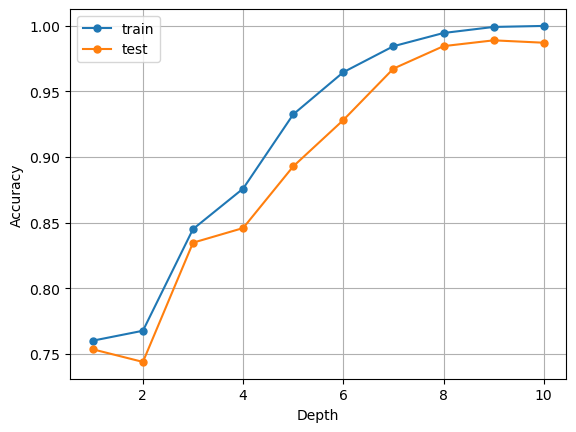

In [3]:
plt.xlabel('Depth')
plt.ylabel('Accuracy')
depth_train_dep, depth_test_dep = depth_accuracy_dependence(X, y)
plt.plot(depth_train_dep, label='train',
marker='.', markersize=10)
plt.plot(depth_test_dep, label='test',
marker='.', markersize=10)

plt.legend()
plt.grid()
plt.show()

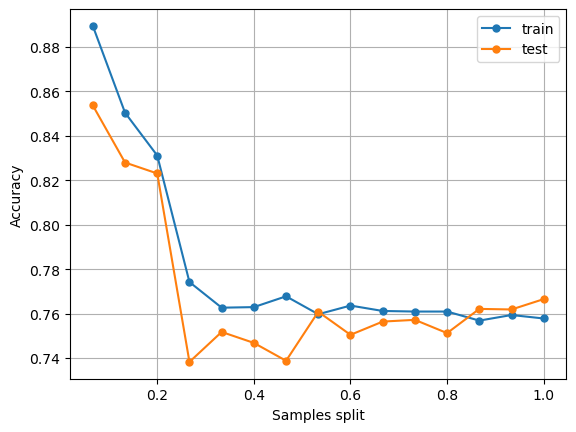

In [4]:
plt.xlabel('Samples split')
plt.ylabel('Accuracy')
samples_split_train_dep, samples_split_test_dep = samples_split_accuracy_dependence(X, y)
plt.plot(samples_split_train_dep, label='train',
marker='.', markersize=10)
plt.plot(samples_split_test_dep, label='test',
marker='.', markersize=10)

plt.legend()
plt.grid()
plt.show()

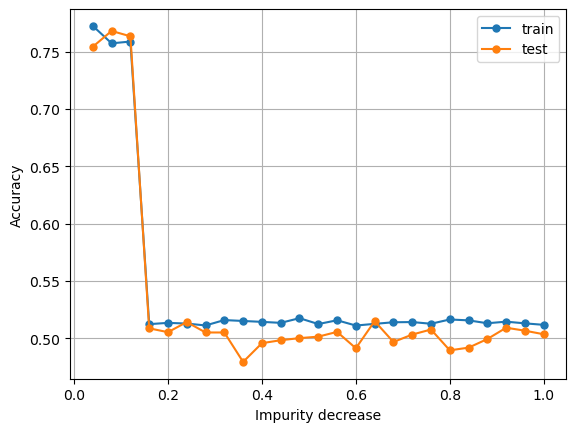

In [5]:
plt.xlabel('Impurity decrease')
plt.ylabel('Accuracy')
impurity_decrease_train_dep, impurity_decrease_test_dep = impurity_decrease_accuracy_dependence(X, y)
plt.plot(impurity_decrease_train_dep, label='train',
marker='.', markersize=10)
plt.plot(impurity_decrease_test_dep, label='test',
marker='.', markersize=10)

plt.legend()
plt.grid()
plt.show()

In [6]:
clf_impurity = DecisionTreeClassifier(max_depth=3, min_samples_split=0.15,
min_impurity_decrease=0.03)
clf_impurity.fit(X_train, y_train)
print('train score: {}'.format(clf_impurity.score(X_train, y_train)))
print('test score: {}'.format(clf_impurity.score(X_test, y_test)))

train score: 0.8255208333333334
test score: 0.7937743190661478


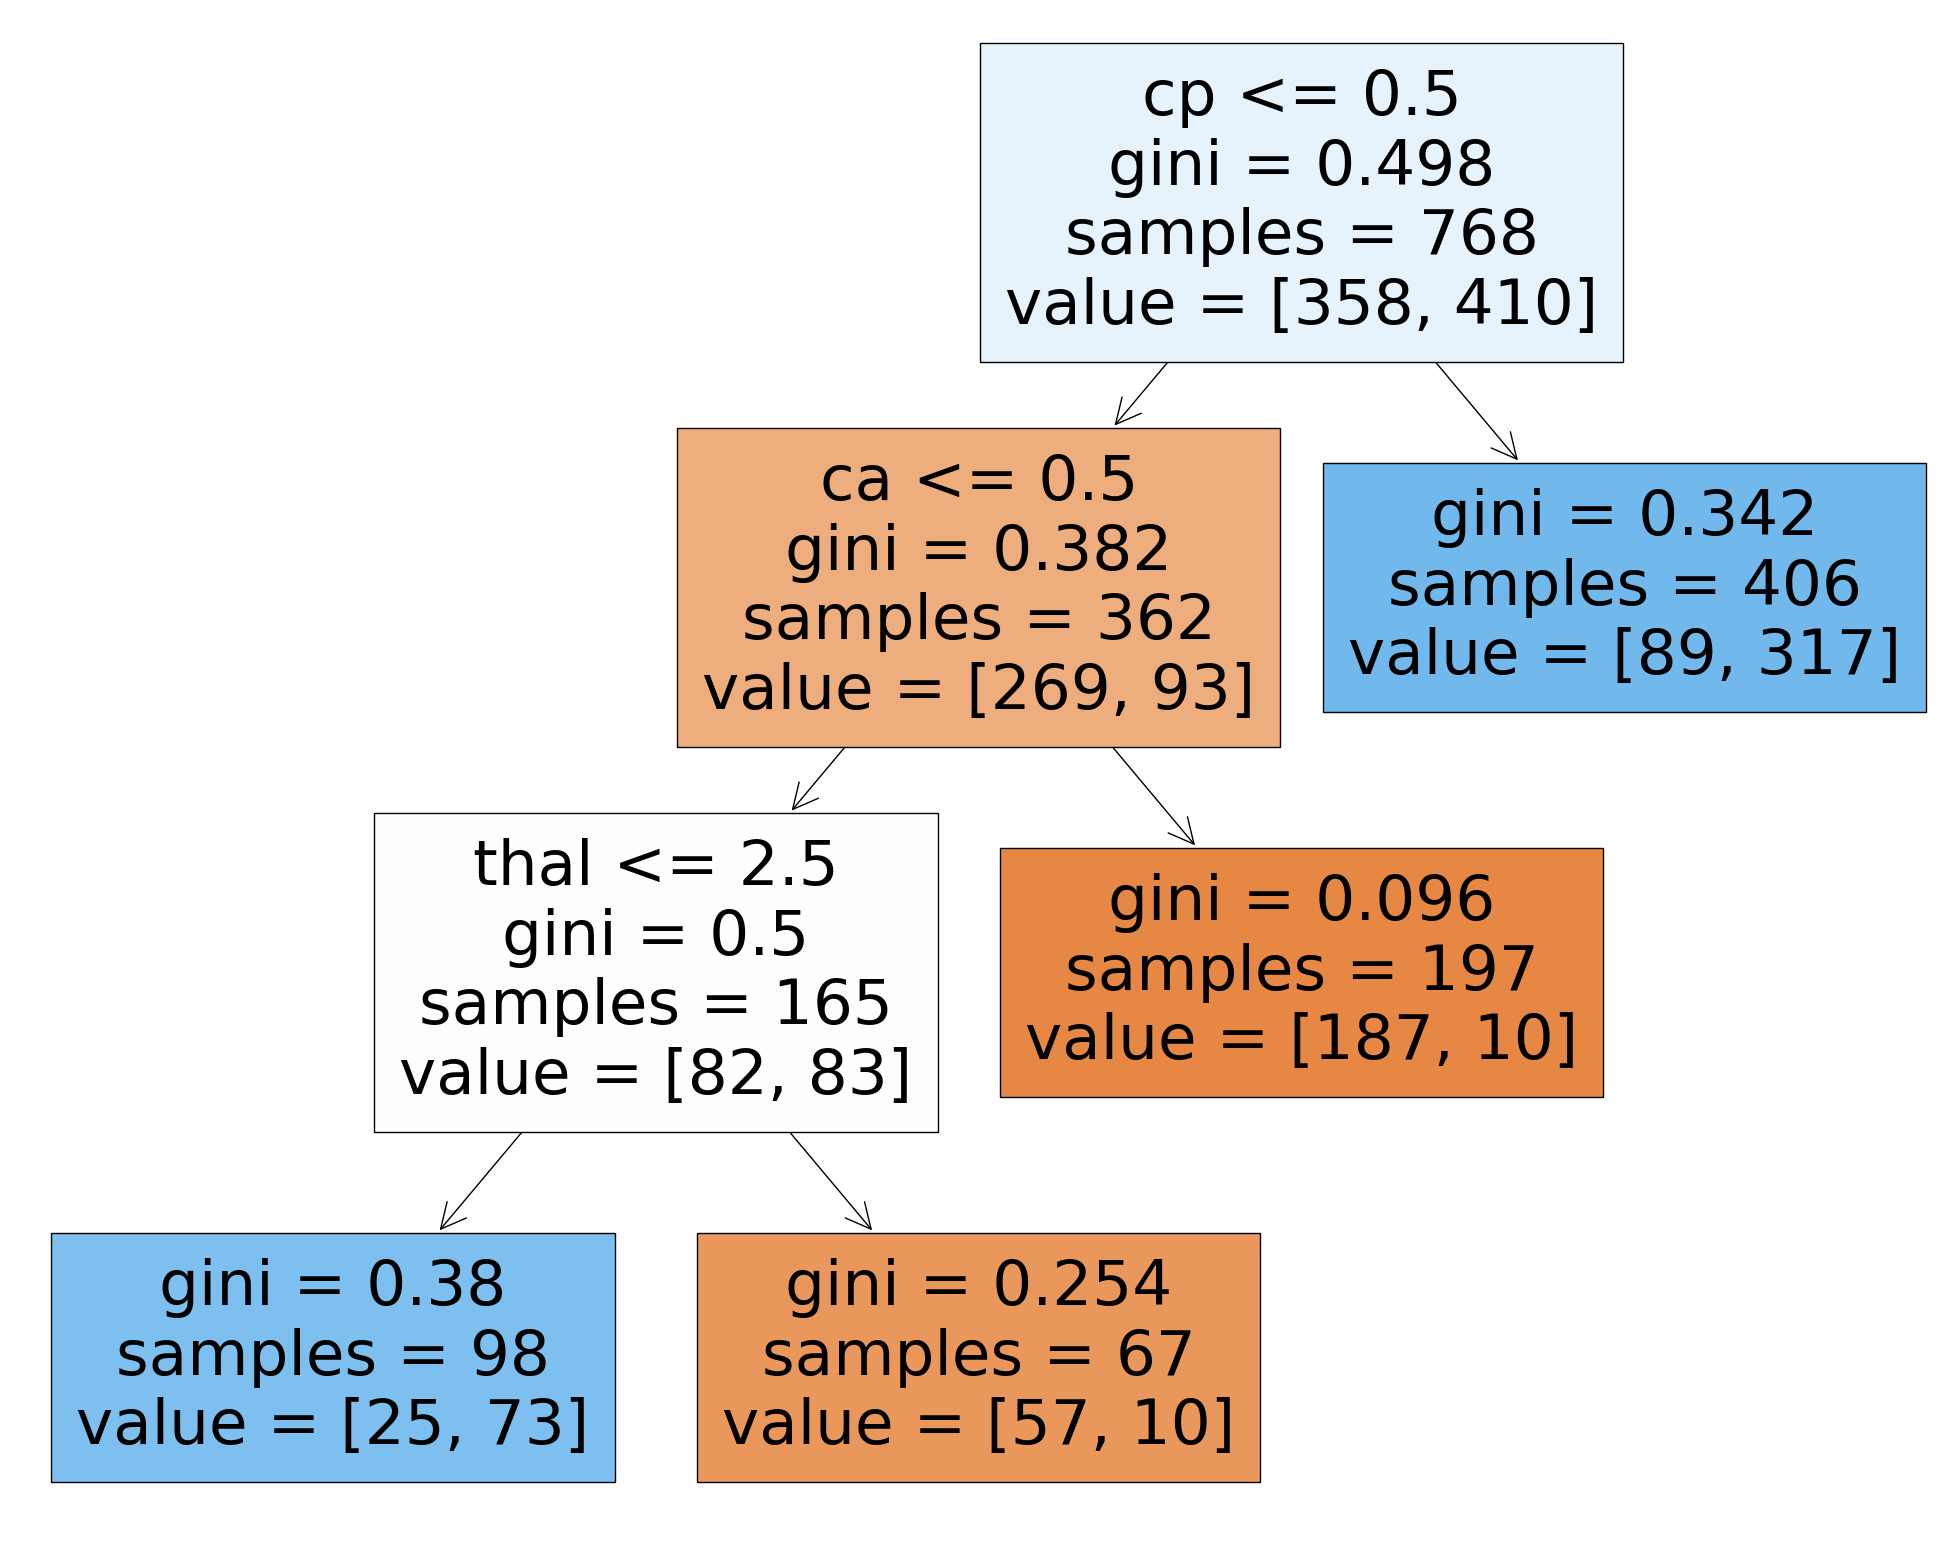

In [7]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf_impurity,
feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
'oldpeak', 'slope', 'ca', 'thal'],
#   class_names=['1'],
filled=True)
fig.savefig("best_tree.png")